<a href="https://colab.research.google.com/github/duraichellam001-tech/epa-co2-architecture/blob/master/notebooks/Physics%2BML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/duraichellam001-tech/epa-co2-architecture.git


Cloning into 'epa-co2-architecture'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 82 (delta 29), reused 56 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (82/82), 1.99 MiB | 8.95 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [13]:
%cd /content/epa-co2-architecture
!git pull


/content
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 8 (delta 4), reused 8 (delta 4), pack-reused 0 (from 0)
Unpacking objects: 100% (8/8), 165.43 KiB | 1.18 MiB/s, done.
From https://github.com/duraichellam001-tech/epa-co2-architecture
   3ce3002..5a61b79  master     -> origin/master
Updating 3ce3002..5a61b79
Fast-forward
 .gitignore                                         |   1 -
 artifacts/epa_co2_architecture_pathA_v1.parquet    | Bin 0 -> 76500 bytes
 .../epa_co2_architecture_pathA_v1_metadata.json    |  26 ++++++++++++++++++
 artifacts/epa_co2_architecture_pathB_v1.parquet    | Bin 0 -> 182072 bytes
 .../epa_co2_architecture_pathB_v1_metadata.json    |  30 +++++++++++++++++++++
 5 files changed, 56 insertions(+), 1 deletion(-)
 create mode 100644 artifacts/epa_co2_architecture_pathA_v1.parquet
 create mode 100644 artifacts/epa_co2_architecture_pathA_v1_metadata.json
 create mode 

In [14]:
import os
os.chdir("/content/epa-co2-architecture")


In [15]:
!ls physics/cycles
!ls artifacts


EPA_CITY.csv  EPA_HWY.csv
epa_co2_architecture_pathA_v1_metadata.json
epa_co2_architecture_pathA_v1.parquet
epa_co2_architecture_pathB_v1_metadata.json
epa_co2_architecture_pathB_v1.parquet


In [16]:
from physics.physics_co2 import compute_city_hwy_co2_g_per_mi


In [5]:
res = compute_city_hwy_co2_g_per_mi(
    mass_lb=4000,
    trans_type="AT",
    drive_layout="FWD"
)
res


{'city': np.float64(296.5653631802091), 'hwy': np.float64(327.1656696279422)}

In [17]:
import pandas as pd

df = pd.read_parquet(
    "artifacts/epa_co2_architecture_pathB_v1.parquet"
)


In [18]:
df.head()


,Model Year,Test Veh Displacement (L),Equivalent Test Weight (lbs.),transmission_bucket,drive_bucket,CO2_combined,CO2_city_gpm,CO2_hwy_gpm
0,2010,0.999,2125,AT,RWD,180.078500,201.260000,154.190000
1,2010,1.300,3000,CVT,FWD,154.106628,162.374183,144.001838
2,2010,1.300,3125,CVT,FWD,151.140680,162.953045,136.703344
3,2010,1.300,3375,AT,RWD,344.400000,411.000000,263.000000
4,2010,1.300,3375,MT,RWD,355.900000,421.000000,276.333333


In [19]:
physics_city = []
physics_hwy = []

for _, row in df.iterrows():
    res = compute_city_hwy_co2_g_per_mi(
        mass_lb=row["Equivalent Test Weight (lbs.)"],
        trans_type=row["transmission_bucket"],
        drive_layout=row["drive_bucket"],
    )
    physics_city.append(res["city"])
    physics_hwy.append(res["hwy"])

df["CO2_physics_city"] = physics_city
df["CO2_physics_hwy"] = physics_hwy


In [20]:
df["Residual_city"] = df["CO2_city_gpm"] - df["CO2_physics_city"]
df["Residual_hwy"]  = df["CO2_hwy_gpm"]  - df["CO2_physics_hwy"]


In [21]:
df[["Residual_city", "Residual_hwy"]].describe()


,Residual_city,Residual_hwy
count,9483.000000,9483.000000
mean,62.035665,-100.143200
std,90.582854,45.619630
min,-184.081294,-232.370879
25%,10.250054,-127.985934
50%,51.048332,-104.733368
75%,104.143283,-75.682923
max,616.757783,204.063970


In [22]:
df.to_parquet(
    "artifacts/epa_co2_architecture_pathB_residuals_v1.parquet",
    index=False
)


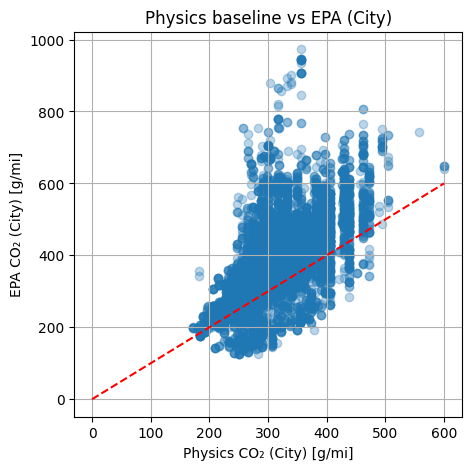

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(
    df["CO2_physics_city"],
    df["CO2_city_gpm"],
    alpha=0.3
)
plt.plot([0,600],[0,600], 'r--')
plt.xlabel("Physics CO₂ (City) [g/mi]")
plt.ylabel("EPA CO₂ (City) [g/mi]")
plt.title("Physics baseline vs EPA (City)")
plt.grid(True)
plt.show()



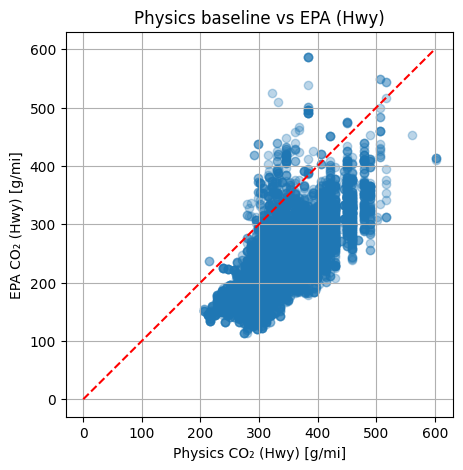

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(
    df["CO2_physics_hwy"],
    df["CO2_hwy_gpm"],
    alpha=0.3
)
plt.plot([0,600],[0,600], 'r--')
plt.xlabel("Physics CO₂ (Hwy) [g/mi]")
plt.ylabel("EPA CO₂ (Hwy) [g/mi]")
plt.title("Physics baseline vs EPA (Hwy)")
plt.grid(True)
plt.show()

In [43]:
df.head()

,Model Year,Test Veh Displacement (L),Equivalent Test Weight (lbs.),transmission_bucket,drive_bucket,CO2_combined,CO2_city_gpm,CO2_hwy_gpm,CO2_physics_city,CO2_physics_hwy,Residual_city,Residual_hwy
0,2010,0.999,2125,AT,RWD,180.078500,201.260000,154.190000,172.480030,206.128366,28.779970,-51.938366
1,2010,1.300,3000,CVT,FWD,154.106628,162.374183,144.001838,225.411549,258.009001,-63.037366,-114.007163
2,2010,1.300,3125,CVT,FWD,151.140680,162.953045,136.703344,233.601461,266.005567,-70.648416,-129.302223
3,2010,1.300,3375,AT,RWD,344.400000,411.000000,263.000000,257.970799,290.884528,153.029201,-27.884528
4,2010,1.300,3375,MT,RWD,355.900000,421.000000,276.333333,247.222015,278.764339,173.777985,-2.431006


In [56]:
df.describe()

,Model Year,Test Veh Displacement (L),Equivalent Test Weight (lbs.),CO2_combined,CO2_city_gpm,CO2_hwy_gpm,CO2_physics_city,CO2_physics_hwy,Residual_city,Residual_hwy
count,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,2017.239165,3.149949,4278.656649,317.287747,377.280994,243.962667,315.245329,344.105867,62.035665,-100.143200
std,4.462617,1.363003,849.557271,89.359627,114.548348,61.125106,59.186352,55.732999,90.582854,45.619630
min,2010.000000,0.600000,2125.000000,122.173867,126.276696,113.411600,172.480030,206.128366,-184.081294,-232.370879
25%,2013.000000,2.000000,3625.000000,254.395886,298.213119,200.011341,271.901352,303.786247,10.250054,-127.985934
50%,2017.000000,2.996000,4250.000000,309.030375,366.072461,236.967450,305.930585,337.497217,51.048332,-104.733368
75%,2021.000000,3.800000,4750.000000,368.024675,442.815000,278.240550,348.897017,376.436102,104.143283,-75.682923
max,2025.000000,8.400000,8500.000000,785.000000,973.000000,587.000000,600.283360,601.198648,616.757783,204.063970


In [25]:
# -----------------------------
# Feature definitions
# -----------------------------

num_features = [
    "Model Year",
    "Test Veh Displacement (L)",
    "Equivalent Test Weight (lbs.)",
    "CO2_physics_city",
]

cat_features = [
    "transmission_bucket",
    "drive_bucket",
]

target_col = "Residual_city"

print("Numerical features:", num_features)
print("Categorical features:", cat_features)
print("Target:", target_col)


Numerical features: ['Model Year', 'Test Veh Displacement (L)', 'Equivalent Test Weight (lbs.)', 'CO2_physics_city']
Categorical features: ['transmission_bucket', 'drive_bucket']
Target: Residual_city


In [26]:
# -----------------------------
# Train / Test split (year-based)
# -----------------------------

TRAIN_END_YEAR = 2018

train_df = df[df["Model Year"] <= TRAIN_END_YEAR].copy()
test_df  = df[df["Model Year"] > TRAIN_END_YEAR].copy()

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)


Train shape: (5601, 12)
Test shape : (3882, 12)


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor


In [28]:
# -----------------------------
# Preprocessing
# -----------------------------

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ]
)

# -----------------------------
# Model
# -----------------------------

gbr = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

pipe_city = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", gbr),
    ]
)


In [29]:
X_train = train_df[num_features + cat_features]
y_train = train_df[target_col]

X_test  = test_df[num_features + cat_features]
y_test  = test_df[target_col]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)


X_train: (5601, 6)
y_train: (5601,)


In [30]:
pipe_city.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Model Year',
                                                   'Test Veh Displacement (L)',
                                                   'Equivalent Test Weight '
                                                   '(lbs.)',
                                                   'CO2_physics_city']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['transmission_bucket',
                                                   'drive_bucket'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=300,
                                           random_state=42))])

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error

residual_pred = pipe_city.predict(X_test)

r2 = r2_score(y_test, residual_pred)
mae = mean_absolute_error(y_test, residual_pred)

print(f"City Residual ML — R2  : {r2:.3f}")
print(f"City Residual ML — MAE : {mae:.2f} g/mi")


City Residual ML — R2  : 0.726
City Residual ML — MAE : 35.84 g/mi


In [32]:
co2_city_pred = (
    test_df["CO2_physics_city"].values + residual_pred
)


In [33]:
from sklearn.metrics import r2_score

r2_physics = r2_score(
    test_df["CO2_city_gpm"],
    test_df["CO2_physics_city"]
)

r2_final = r2_score(
    test_df["CO2_city_gpm"],
    co2_city_pred
)

print(f"Physics-only R2 : {r2_physics:.3f}")
print(f"Physics + ML R2 : {r2_final:.3f}")


Physics-only R2 : 0.227
Physics + ML R2 : 0.819


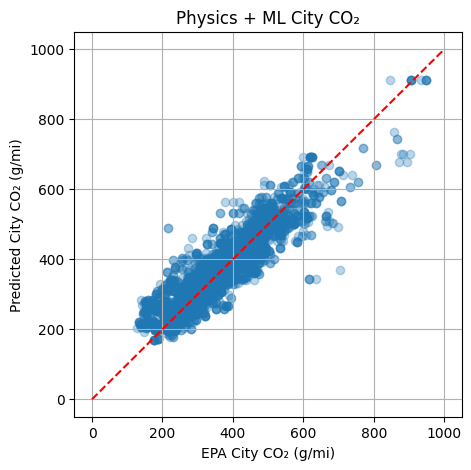

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(
    test_df["CO2_city_gpm"],
    co2_city_pred,
    alpha=0.3
)
plt.plot([0,1000],[0,1000],'r--')
plt.xlabel("EPA City CO₂ (g/mi)")
plt.ylabel("Predicted City CO₂ (g/mi)")
plt.title("Physics + ML City CO₂")
plt.grid(True)
plt.show()


In [35]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_final_city = r2_score(
    test_df["CO2_city_gpm"],
    co2_city_pred
)

mae_final_city = mean_absolute_error(
    test_df["CO2_city_gpm"],
    co2_city_pred
)

print(f"Final City CO2 — R2  : {r2_final_city:.3f}")
print(f"Final City CO2 — MAE : {mae_final_city:.2f} g/mi")


Final City CO2 — R2  : 0.819
Final City CO2 — MAE : 35.84 g/mi


In [37]:
import joblib
import os

os.makedirs("models/pathB", exist_ok=True)


In [38]:
joblib.dump(
    pipe_city,
    "models/pathB/city_residual_gbr_v1.joblib"
)


['models/pathB/city_residual_gbr_v1.joblib']

In [39]:
pipe_city_loaded = joblib.load(
    "models/pathB/city_residual_gbr_v1.joblib"
)

# quick sanity prediction
_ = pipe_city_loaded.predict(X_test[:5])


In [40]:
# -----------------------------
# Feature definitions (Highway)
# -----------------------------

num_features_hwy = [
    "Model Year",
    "Test Veh Displacement (L)",
    "Equivalent Test Weight (lbs.)",
    "CO2_physics_hwy",
]

cat_features = [
    "transmission_bucket",
    "drive_bucket",
]

target_col_hwy = "Residual_hwy"

print("Numerical features:", num_features_hwy)
print("Categorical features:", cat_features)
print("Target:", target_col_hwy)


Numerical features: ['Model Year', 'Test Veh Displacement (L)', 'Equivalent Test Weight (lbs.)', 'CO2_physics_hwy']
Categorical features: ['transmission_bucket', 'drive_bucket']
Target: Residual_hwy


In [41]:
preprocess_hwy = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features_hwy),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ]
)

gbr_hwy = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

pipe_hwy = Pipeline(
    steps=[
        ("preprocess", preprocess_hwy),
        ("model", gbr_hwy),
    ]
)


In [44]:
# -----------------------------
# Train / Test split (year-based)
# -----------------------------

TRAIN_END_YEAR = 2018

train_df = df[df["Model Year"] <= TRAIN_END_YEAR].copy()
test_df  = df[df["Model Year"] > TRAIN_END_YEAR].copy()

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)


Train shape: (5601, 12)
Test shape : (3882, 12)


In [45]:
X_train_hwy = train_df[num_features_hwy + cat_features]
y_train_hwy = train_df[target_col_hwy]

X_test_hwy  = test_df[num_features_hwy + cat_features]
y_test_hwy  = test_df[target_col_hwy]

print("X_train_hwy:", X_train_hwy.shape)
print("y_train_hwy:", y_train_hwy.shape)


X_train_hwy: (5601, 6)
y_train_hwy: (5601,)


In [46]:
pipe_hwy.fit(X_train_hwy, y_train_hwy)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Model Year',
                                                   'Test Veh Displacement (L)',
                                                   'Equivalent Test Weight '
                                                   '(lbs.)',
                                                   'CO2_physics_hwy']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['transmission_bucket',
                                                   'drive_bucket'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=300,
                                           random_state=42))])

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error

residual_pred_hwy = pipe_hwy.predict(X_test_hwy)

r2_hwy = r2_score(y_test_hwy, residual_pred_hwy)
mae_hwy = mean_absolute_error(y_test_hwy, residual_pred_hwy)

print(f"Highway Residual ML — R2  : {r2_hwy:.3f}")
print(f"Highway Residual ML — MAE : {mae_hwy:.2f} g/mi")


Highway Residual ML — R2  : 0.646
Highway Residual ML — MAE : 21.10 g/mi


In [48]:
co2_hwy_pred = (
    test_df["CO2_physics_hwy"].values + residual_pred_hwy
)


In [49]:
r2_physics_hwy = r2_score(
    test_df["CO2_hwy_gpm"],
    test_df["CO2_physics_hwy"]
)

r2_final_hwy = r2_score(
    test_df["CO2_hwy_gpm"],
    co2_hwy_pred
)

print(f"Physics-only Hwy R2 : {r2_physics_hwy:.3f}")
print(f"Physics + ML Hwy R2 : {r2_final_hwy:.3f}")


Physics-only Hwy R2 : -2.931
Physics + ML Hwy R2 : 0.794


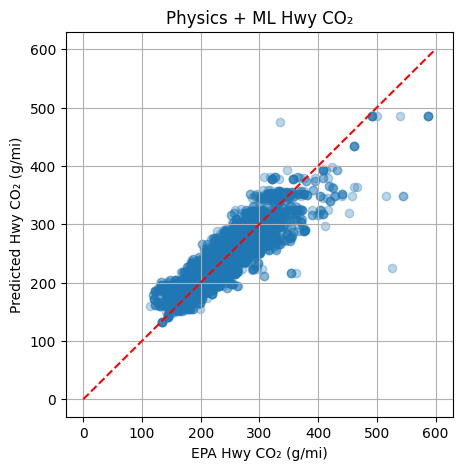

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(
    test_df["CO2_hwy_gpm"],
    co2_hwy_pred,
    alpha=0.3
)
plt.plot([0,600],[0,600],'r--')
plt.xlabel("EPA Hwy CO₂ (g/mi)")
plt.ylabel("Predicted Hwy CO₂ (g/mi)")
plt.title("Physics + ML Hwy CO₂")
plt.grid(True)
plt.show()


In [52]:
co2_combined_pred = (
    0.55 * co2_city_pred +
    0.45 * co2_hwy_pred
)


In [53]:
co2_combined_true = (
    0.55 * test_df["CO2_city_gpm"].values +
    0.45 * test_df["CO2_hwy_gpm"].values
)


In [54]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_combined = r2_score(co2_combined_true, co2_combined_pred)
mae_combined = mean_absolute_error(co2_combined_true, co2_combined_pred)

print(f"Final Combined CO2 — R2  : {r2_combined:.3f}")
print(f"Final Combined CO2 — MAE : {mae_combined:.2f} g/mi")


Final Combined CO2 — R2  : 0.825
Final Combined CO2 — MAE : 27.99 g/mi


In [55]:
joblib.dump(
    pipe_city,
    "models/pathB/hwy_residual_gbr_v1.joblib"
)


['models/pathB/hwy_residual_gbr_v1.joblib']